# IMPORTING NECESSARY MODULES

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  #For Visualisation
%matplotlib inline
import seaborn as sns  #For Visualisation
from bs4 import BeautifulSoup  # For Text Parsing

# IMPORTING DATASET

In [23]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Untitled folder/Reviews.csv')
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


# DATA PREPROCESSING & VISUALISATION

In [24]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [25]:
data=data.dropna()
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [26]:
data.shape

(568411, 10)

In [27]:
score_unique = data['Score'].unique()
print(score_unique)

[5 1 4 2 3]


In [28]:
#   0-> NEGATIVE REVIEW
#   1-> NEUTRAL REVIEW
#   2-> POSTIVE REVIEW
a=[]
for i in data['Score']:
    if i <3:                              
        a.append(0)
    if i==3:
        a.append(1)
    if i>3:
        a.append(2)

In [29]:
r_0, r_1, r_2 = 0, 0, 0
for i in a:
    if i == 0:
        r_0 += 1
    elif i == 1:
        r_1 += 1
    else:
        r_2 += 1

print('Negative Reviews:',r_0)
print('Neutral Reviews:',r_1)
print('Positive Reviews:',r_2)

Negative Reviews: 82007
Neutral Reviews: 42638
Positive Reviews: 443766


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


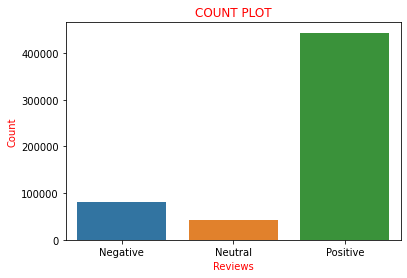

In [30]:
sns.countplot(a)
plt.xlabel('Reviews', color = 'red')
plt.ylabel('Count', color = 'red')
plt.xticks([0,1,2],['Negative','Neutral','Positive'])
plt.title('COUNT PLOT', color = 'r')
plt.show()

In [31]:
data['sentiment']=a
#data
final_dataset = data[['Text','sentiment']]
final_dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Text,sentiment
0,I have bought several of the Vitality canned d...,2
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,2
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,2
...,...,...
568449,Great for sesame chicken..this is a good if no...,2
568450,I'm disappointed with the flavor. The chocolat...,0
568451,"These stars are small, so you can give 10-15 o...",2
568452,These are the BEST treats for training and rew...,2


In [32]:
data_p=final_dataset[data['sentiment']==2]
data_n=final_dataset[data['sentiment']==0]
len(data_p), len(data_n)

(443766, 82007)

In [33]:
datap = data_p.iloc[np.random.randint(1,443766,5000), :]
datan = data_n.iloc[np.random.randint(1, 82007,5000), :]
len(datan), len(datap)

(5000, 5000)

In [34]:
data = pd.concat([datap,datan])
len(data)

10000

In [35]:
c=[]
for i in data['sentiment']:
    if i==0:
        c.append(0)
    if i==2:
        c.append(1)
data['sentiment']=c

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


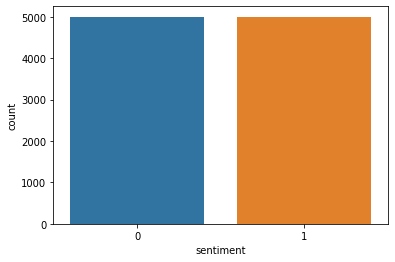

In [36]:
sns.countplot(data['sentiment'])
plt.show()

In [37]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
data['review'] = data['Text'].apply(strip_html)

data=data.drop('Text',axis=1)

data.head()

,sentiment,review
13984,1,Each filter pack is perfect for brewing 4 cups...
299015,1,Received excellent product on time and as desc...
116484,1,This popcorn is perfectly seasoned and uses oi...
567790,1,"Everything about the order went great, the Hot..."
491430,1,If you want to avoid visiting the porcelain th...


# MODEL BUILDING

In [44]:
import nltk  #Natural Language Processing Toolkit
nltk.download('stopwords')
from nltk.corpus import stopwords
def punc_clean(text):
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)
data['review'] = data['review'].apply(punc_clean)
data.head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentiment,review
13984,1,Each filter pack is perfect for brewing 4 cups...
299015,1,Received excellent product on time and as desc...


In [46]:
nltk.download('punkt')

def remove_stopword(text):
    stopword=set(stopwords.words('english'))
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)
data['review'] = data['review'].apply(remove_stopword)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectr = TfidfVectorizer(ngram_range=(1,2),min_df=1)
vectr.fit(data['review'])

vect_X = vectr.transform(data['review'])

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

clf=model.fit(vect_X,data['sentiment'])
clf.score(vect_X,data['sentiment'])*100

96.72

# PREDICTION

In [49]:
clf.predict(vectr.transform(['''I love ice cream''']))

array([1])

In [56]:
clf.predict(vectr.transform(['''this is my 3rd comment, I don’t understand why my review is deleted twice. Because of negative comment or dislike? criticizing is forbidden? i will post it again insistently even if my comment is deleted at every turn. following is my honest opinion:After trying Ideal extreme in a store, To me this is not refined or smooth. I get edgy and synthetic feeling. I am astonished this fragrance is the winner of 2020. Nothing unique or special.I think i'm the only one who gets ambroxan type of smell..''']))

array([1])

In [59]:
clf.predict(vectr.transform(['''The top is beautifully fruity and sparkling, it's a different execution from the previous flankers. Amazing spicy plum with the signature almond heart of L'Homme Ideal.  There's a fiery cinnamon that's beautifully persistent on the skin. I have an extra bottle, in case anyone wants to exchange :)''']))

array([0])

In [58]:
clf.predict(vectr.transform(['''Really like the scent but I have to brutally overspray to get any type of moderate performance.''']))

array([1])

In [54]:
clf.predict(vectr.transform(['''It's Luxury in a bottle, loved it so much ,so beautiful, elegant, chic''']))

array([1])

In [51]:
clf.predict(vectr.transform(['''My new favorite of the mon guerlain line. Sensuelle was my previous  favorite, but it didn't last as long as I would have liked. This is  amazing and lasts much longer. It's also sweeter''']))

array([1])

In [60]:
clf.predict(vectr.transform(['''After wearing this for several weeks I regret my purchase. Way Way  overhyped and priced. Lasts maybe 3 hours on skin. Delicate fruity  tobacco. So in retrospect I'd stay with SpiceBomb Extreme and Jacques  Fath Pour L'Homme. The Guerlain is just too delicate and short lived.''']))

array([0])

In [55]:
clf.predict(vectr.transform(['''Simply a masterpiece of scent. It feels like I’m floating on a soft  cloud of sweet soft lavender and vanilla. It is smooth and sweet and  feminine from start to finish. Very long lasting scent too. I get at  least 8 hours of longevity. It’s a very comforting scent.''']))

array([1])